<H1> Prédiction des ventes chez Walmart </H1>


Le problème considéré ici est bâti à partir d'une compétition Kaggle, https://www.kaggle.com/c/walmart-recruiting-store-sales-forecasting
où il s'agissait de prévoir les ventes dans les différents départements des 45 magasins Walmart des Etats-Unis. 
Le problème a été simplifié ici en regroupant les ventes des différents départements pour ne s'intéresser qu'aux ventes globales des magasins, et supprimant les données relatives aux campagnes publicitaires, en modifiant quelques données. 

L'objectif sera donc de prédire les ventes des différents magasins, à partir d'un historique sur 3 années comprenant :

- fichier data.csv
    - 'store':  numéro du magasin
    - 'date' : date (semaine considérée)
    - 'Weekly Sales' : ventes de la semaine (en \$)
    - 'Temperature' : température (en ° Kelvins)
    - 'Fuel_Price' : prix du carburant (en \$)
    - 'CPI' : [Consumer Price Index](https://www.bls.gov/cpi/)
    - 'Unemployment' : taux de chomage
    - 'IsHoliday' : période de vacances (Vrai/faux)

- fichier stores.csv
    - 'store' : numéro du magasin
    - 'Type' : type de magasin
    - 'Size' : surface

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

<H1> Prédiction des ventes chez Walmart </H1>

**Introduction :**


J'ai décidé de partager mon travail en deux parties : 

1. Une première partie concentrée sur l'exploration, on pourrait qualifier cette partie de "brouillon" mais elle m'a été néanmoins très utile. Elle m'a permit de bien cerner le dataset, de comprendre ce que chaque données voulait dire, et d'avoir une vue globale sur le devoir. Grâce à cela j'ai pu exploiter les données, les transformer et voir ce qui était utile de faire. Il est important de noter que cette partie sera expliquée de manière chronologique en retraçant tout mon code pour expliquer pas à pas mon niveau de compréhension du dataset.


2. Dans la deuxième partie je me suis concentré sur ce qui était le plus efficace et donc sur la prédiction en essayant d'avoir un model aussi précis que possible.


## Partie 1

1. Mon premier reflex a été de chécker tout le dataset ainsi que les types des données et les premières chose qui m'ont semblé importantes sont :

    - On a une colonne qui ne sert à rien nommé "Unnamed :0" Je vais donc la supprimer
    - On a une colonne "date" qui n'est pas exprimé en tant que telle mais en tant qu'object, ce sera à changer.
    - On a une colonne "type" qui est de type object, je vais donc la mapper.


2. Je vais maintenant m'intéresser  aux données manquantes :
    
    - Je remarque qu'il y a peu de données manquante mais dispatchées sur plusieurs colonnes, On pourrait choisir de les supprimer mais j'ai pris la décision de remplacer chaques valeurs manquantes par la moyenne de sa colonne.


3. Je vais désormais m'occuper des valeurs aberrantes ainsi que des corrélations entres données prédictives et données à prédire à partir de graphiques regplot :

    - Je vois qu'il y a une donnée totalement aberrante dans la variable à prédire "Weekly Sales", je vais donc la supprimer.
    - En faisant une deuxième itération des graphiques je remarque qu'il y a des valeurs négatives de "Weekly Sales", ce qui me semble aberrant pour des ventes, de plus je vois une valeur écartée des autres dans "Fuel_Price", tout cela sera supprimé.
    - Dans la troisième et dernière itération des graphiques je commence à voir quelles sont les corrélations, cependant je pourrais faire quelque chose de plus clair.
    

4. étant donné que les données sont un peu plus propres je vais commencer à déployer les deux modèles tout de suite :

    - J'essaye la régression linéaire en splitant mes données entre données pour le train et données pour tester le score à hauteur de 25%, j'obtient un score de 0.68 ce qui me parait être un bon début mais pas assez suffisant. je décide de visualiser l'erreur quadratique moyenne et j'obtient ce qui semble être un mauvais score.
    - J'essaye la régression par les k plus proches voisins et j'obtient un score de 0.924, cela me parait pas mal du tout mais pour être sur d'avoir utilisé un bon nombre k de voisins je décide de faire un graphique représentant l'erreur quadratique moyenne en fonction de k allant de 1 à 100, en compilant plusieurs fois ce graphique je vois que les meilleurs k dans ce cas sont entre 5 et 40.
    
    
5. J'ai pour le moment un modèle KNN plutôt efficace mais le modèle de régression linéaire pourrait être bien meilleur. Je vais donc m'intéresser plus en détails aux données pour en tirer le meilleur :

    - Je vais tout de suite essayer les fonctions logarithme, racine carré et racine cubique à mes données de type numérique(float et int) et voir leurs corrélation avec la variable à prédire. Je vois que d'une manière générale les fonctions essayées n'augmentent pas la corrélation et donc n'apporte pas plus de sens.
    - Je ne me suis, pour le moment, pas servis de la donnée "date", je vais donc afficher un graphique traçant les deux années et demi de ventes hebdomadaires, ce qui saute aux yeux ce sont les augmentations de ventes en fin d'année mais d'une manière générale la date semble bien corrélée aux ventes. Je vais alors extraire cette variable "date" en 3 autres : jour du mois, jour de la semaine et mois et les introduire dans le dataset. 
    - En visualisant les dataset je remarque assez vite que la donnée jour de la semaine ne sert à rien car elle affiche toujours la même valeur.
    

6. Je décide à ce moment d'afficher les corrélations entre toutes les données :

    - Je remarque que "Type" et "Size" sont très corrélés avec les "Weekly Sales", "Unemployment" et "store" sont quant à eux que légérement corrélé avec les ventes. Je note que "month" semble très peu corrélé alors que j'attendais une valeur plus grande.
    - Je décide d'afficher sur un graphique la variable "day" et "month" selon les ventes pour voir ce qu'il en est, je vois qu'on peut quand même faire quelque chose avec.
    

7. Je vais désormais faire un mapping sur la variable mois :

    - Je décide de catégoriser les mois en 4 types de mois selon leur vente, avec du recul ce n'est pas génial de faire ça et c'est très arbitraire. De plus je ne l'ai pas fait sur la variable "day" car il y a trop de valeurs a mapper, j'en conclut, ici, qu'utiliser une fonction de one-hot encoder pourrait être pas mal. 


8. Je standardise toutes les données numériques car c'est souvent conseillés et j'affiche encore une fois des graphiques regplot de toutes mes données en fonction des ventes :

    - Je vois que rien n'a vraiment changé, les graphiques ressemblent à ceux d'avant.


9. Je remet dans la colonne "month" sa valeur de base avant le mapping et je décide d'encoder en one-hot les données "month" et "day" :

    - j'obtient donc 12 colonnes différentes pour représenter les mois et 31 colonnes différentes pour représenter les jours, j'espère  que cela va augmenter le score lors de régression.
    
    
10. Dernier essai d'un modèle prédictif de régression linéaire :

    - Après avoir concaténer les colonnes de mes données numériques, catégorielles et de codage one-hot, je décide de refaire un train_test_split. J'entraine donc mes données et j'obtient un score de 0.725 sur les données de test, le score s'est un peu augmenté mais ça reste bas par rapport au KNN.
    - J'affiche l'erreur quadratique moyenne et elle a un petit peu baissé mais sans plus.
    - j'affiche les coefficients de régression et je remarque que c'est le même nombre pour tous les mois et pareil pour les jours, j'imagine que cela joue un rôle important par rapport à la faible augmentation du score.

In [2]:
df1 = pd.read_csv('data2.csv',sep = ';',header=0)
df2 = pd.read_csv('stores.csv',sep = ',',header=0)

df = df1.merge(df2, left_on='store ', right_on='Store')

df

,Unnamed: 0,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,Size
0,0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,0.0,1643690.90,1,A,151315
1,1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,1.0,1641957.44,1,A,151315
2,2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,0.0,1611968.17,1,A,151315
3,3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,0.0,1409727.59,1,A,151315
4,4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,0.0,1554806.68,1,A,151315
...,...,...,...,...,...,...,...,...,...,...,...,...
6415,6430,45.0,2012-09-28,64.88,3.997,192.013558,8.684,0.0,713173.95,45,B,118221
6416,6431,45.0,2012-10-05,64.89,3.985,192.170412,8.667,0.0,733455.07,45,B,118221
6417,6432,45.0,2012-10-12,54.47,4.000,192.327265,8.667,0.0,734464.36,45,B,118221
6418,6433,45.0,2012-10-19,56.47,3.969,192.330854,8.667,0.0,718125.53,45,B,118221


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 6419
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    6420 non-null   int64  
 1   store         6420 non-null   float64
 2   date          6409 non-null   object 
 3   Temperature   6403 non-null   float64
 4   Fuel_Price    6410 non-null   float64
 5   CPI           6405 non-null   float64
 6   Unemployment  6402 non-null   float64
 7   IsHoliday     6412 non-null   float64
 8   Weekly Sales  6420 non-null   float64
 9   Store         6420 non-null   int64  
 10  Type          6420 non-null   object 
 11  Size          6420 non-null   int64  
dtypes: float64(7), int64(3), object(2)
memory usage: 652.0+ KB


In [4]:
df.drop('Unnamed: 0', axis = 1, inplace=True)

In [5]:
df['date'] = df['date'].apply(pd.to_datetime)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 6419
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6420 non-null   float64       
 1   date          6409 non-null   datetime64[ns]
 2   Temperature   6403 non-null   float64       
 3   Fuel_Price    6410 non-null   float64       
 4   CPI           6405 non-null   float64       
 5   Unemployment  6402 non-null   float64       
 6   IsHoliday     6412 non-null   float64       
 7   Weekly Sales  6420 non-null   float64       
 8   Store         6420 non-null   int64         
 9   Type          6420 non-null   object        
 10  Size          6420 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(2), object(1)
memory usage: 601.9+ KB


In [7]:
df['Type'].unique()

array(['A', 'B', 'C'], dtype=object)

In [8]:
mapping_type = {
        'A': 0,
        'B' : 1,
        'C': 2
}

df['Type']=df['Type'].replace(mapping_type)

In [9]:
df['Type'].unique()

array([0, 1, 2], dtype=int64)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6420 entries, 0 to 6419
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   store         6420 non-null   float64       
 1   date          6409 non-null   datetime64[ns]
 2   Temperature   6403 non-null   float64       
 3   Fuel_Price    6410 non-null   float64       
 4   CPI           6405 non-null   float64       
 5   Unemployment  6402 non-null   float64       
 6   IsHoliday     6412 non-null   float64       
 7   Weekly Sales  6420 non-null   float64       
 8   Store         6420 non-null   int64         
 9   Type          6420 non-null   int64         
 10  Size          6420 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(3)
memory usage: 601.9 KB


In [11]:
df.isna().sum()

store            0
date            11
Temperature     17
Fuel_Price      10
CPI             15
Unemployment    18
IsHoliday        8
Weekly Sales     0
Store            0
Type             0
Size             0
dtype: int64

<AxesSubplot:>

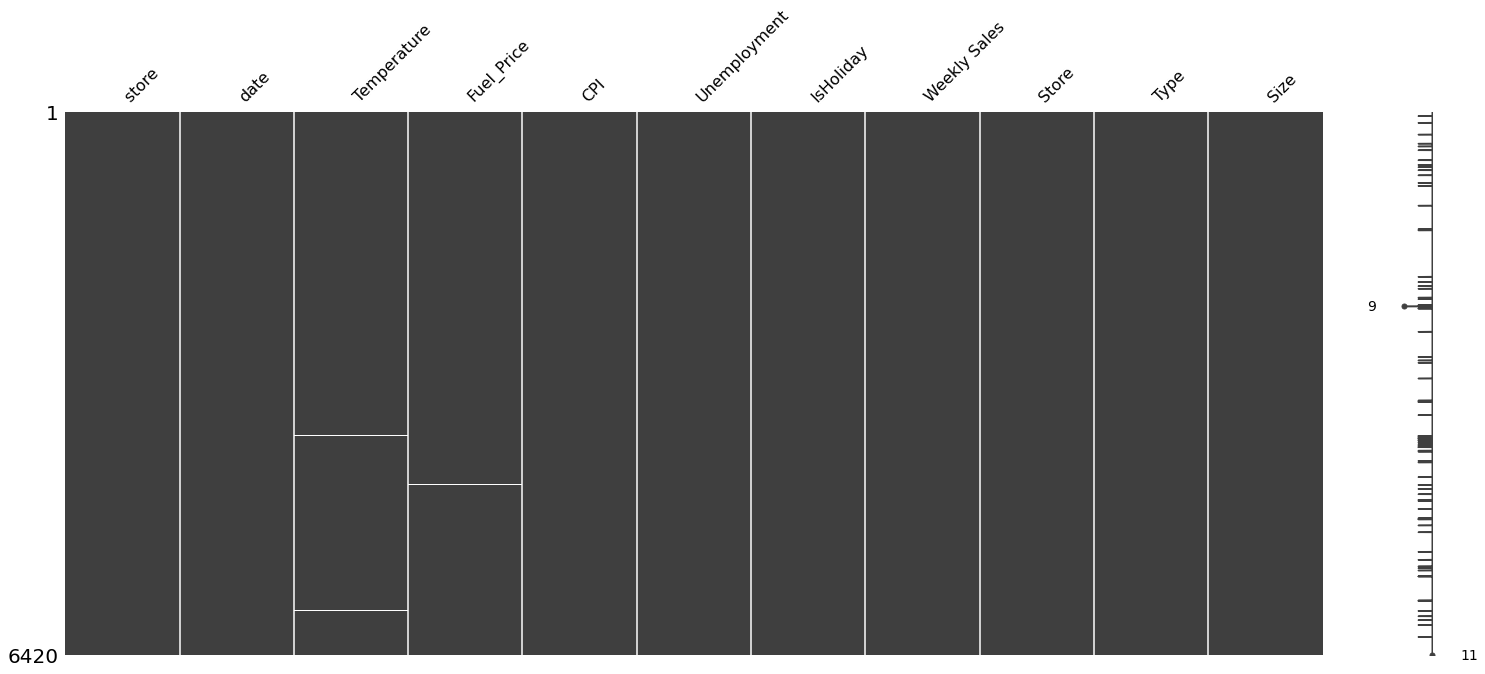

In [12]:
import missingno as missviz

missviz.matrix(pd.DataFrame(df))

In [13]:
values = {'store ': df['store '].mean(),'Temperature': df['Temperature'].mean(),
          'Fuel_Price': df['Fuel_Price'].mean(),'Size': df['Size'].mean(),
          'CPI': df['CPI'].mean(), 'Unemployment': df['Unemployment'].mean(),
          'IsHoliday' : df['IsHoliday'].mean(), 'date' : df['date'].mean()}

df = df.fillna(value=values)



In [14]:
df.isna().sum()

store           0
date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Weekly Sales    0
Store           0
Type            0
Size            0
dtype: int64

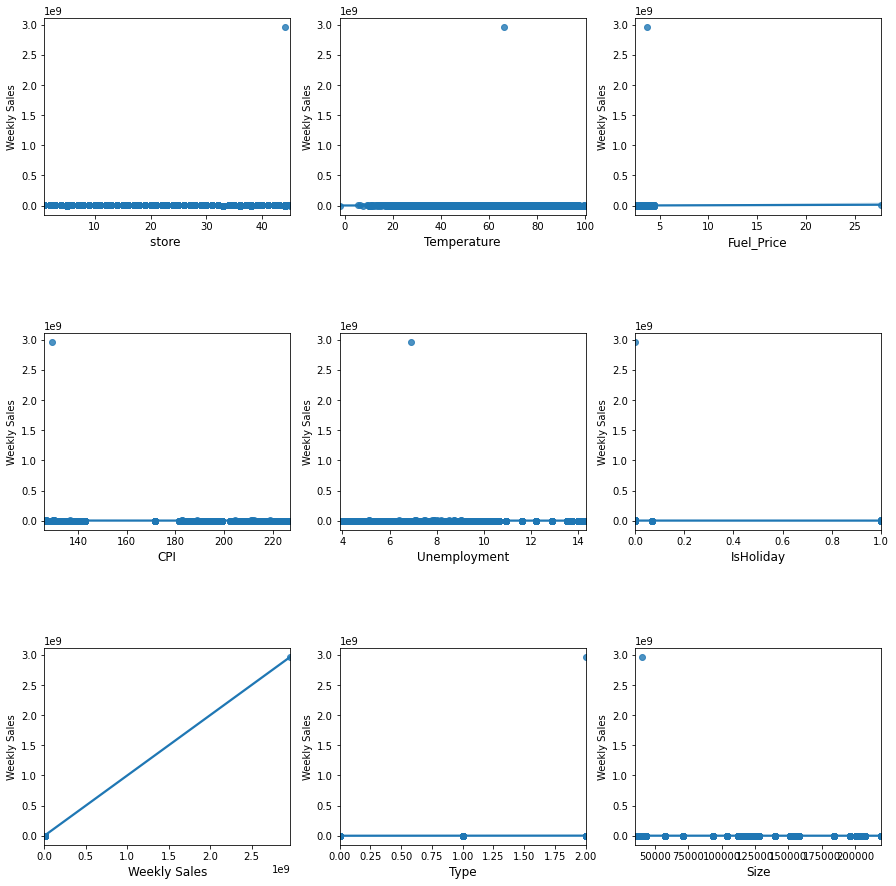

In [15]:
numlist = ['store ','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Weekly Sales','Type','Size']


rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Weekly Sales", data=df)
    subCnt = subCnt + 1

plt.show()



In [16]:
df[df['Weekly Sales']<10e9]

,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,Size
0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,0.0,1643690.90,1,0,151315
1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,1.0,1641957.44,1,0,151315
2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,0.0,1611968.17,1,0,151315
3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,0.0,1409727.59,1,0,151315
4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,0.0,1554806.68,1,0,151315
...,...,...,...,...,...,...,...,...,...,...,...
6415,45.0,2012-09-28,64.88,3.997,192.013558,8.684,0.0,713173.95,45,1,118221
6416,45.0,2012-10-05,64.89,3.985,192.170412,8.667,0.0,733455.07,45,1,118221
6417,45.0,2012-10-12,54.47,4.000,192.327265,8.667,0.0,734464.36,45,1,118221
6418,45.0,2012-10-19,56.47,3.969,192.330854,8.667,0.0,718125.53,45,1,118221


In [17]:
df = df[df['Weekly Sales']<1e9]


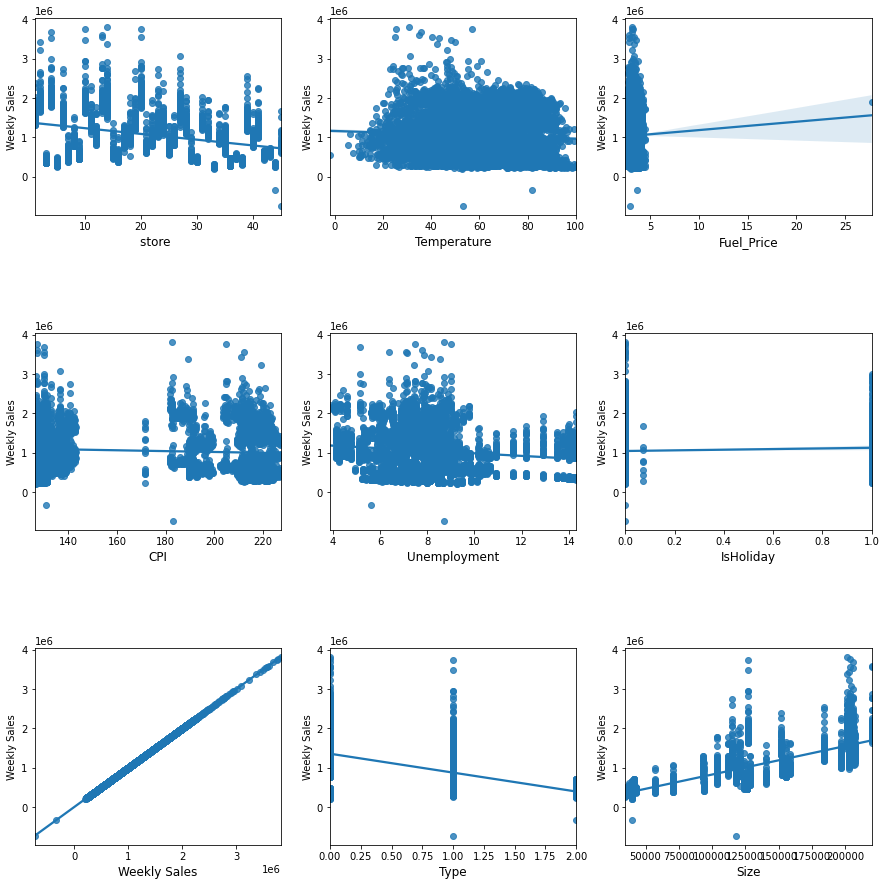

In [18]:

rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Weekly Sales", data=df)
    subCnt = subCnt + 1

plt.show()

In [19]:
df

,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,Size
0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,0.0,1643690.90,1,0,151315
1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,1.0,1641957.44,1,0,151315
2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,0.0,1611968.17,1,0,151315
3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,0.0,1409727.59,1,0,151315
4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,0.0,1554806.68,1,0,151315
...,...,...,...,...,...,...,...,...,...,...,...
6415,45.0,2012-09-28,64.88,3.997,192.013558,8.684,0.0,713173.95,45,1,118221
6416,45.0,2012-10-05,64.89,3.985,192.170412,8.667,0.0,733455.07,45,1,118221
6417,45.0,2012-10-12,54.47,4.000,192.327265,8.667,0.0,734464.36,45,1,118221
6418,45.0,2012-10-19,56.47,3.969,192.330854,8.667,0.0,718125.53,45,1,118221


In [20]:
df = df[df['Fuel_Price']<10]
df = df[df['Weekly Sales']>0]

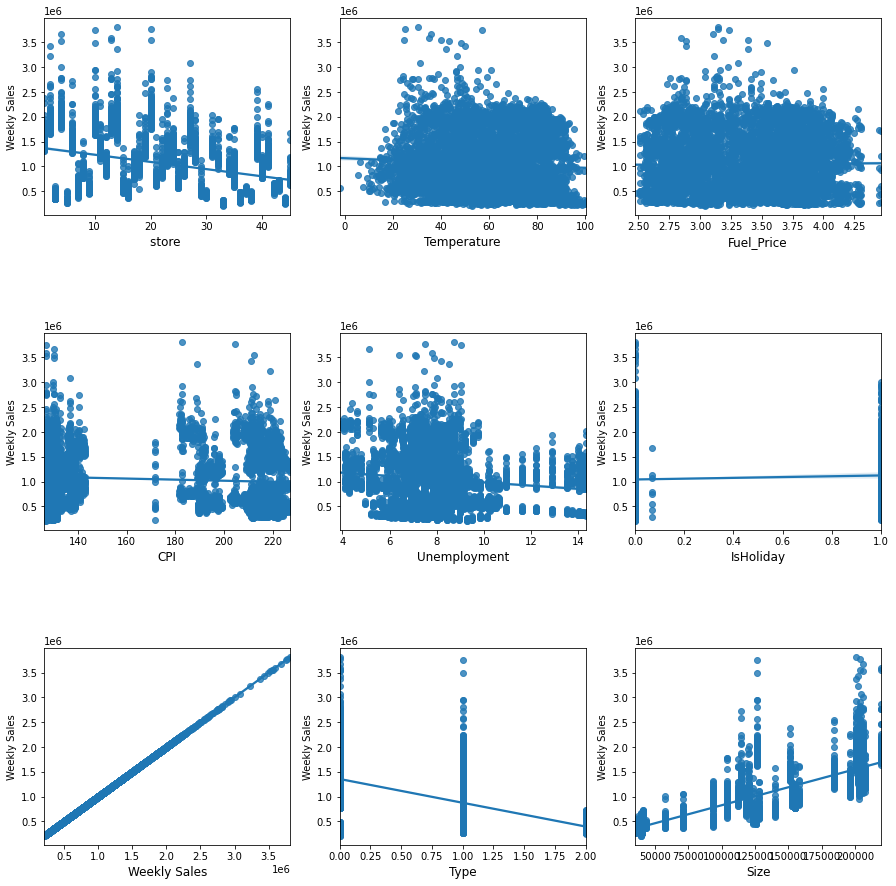

In [21]:
rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Weekly Sales", data=df)
    subCnt = subCnt + 1

plt.show()

In [22]:
xlist = ['store ','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Type','Size']
x = df[xlist]
y = df['Weekly Sales']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=1)


In [23]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
regr.fit(xtrain,ytrain)

print(regr.coef_)
print(regr.intercept_)

[-7.22956852e+03  1.31578322e+03 -1.51571878e+04 -1.64734269e+03
 -1.56943110e+04  1.16529500e+05  1.04898671e+05  7.77956981e+00]
500870.67760599614


In [24]:
regr.score(xtest,ytest)

0.6858939480251122

In [25]:
from sklearn.metrics import mean_squared_error

ypred = regr.predict(xtest)

print('MSE : ')
print("{:e}".format(mean_squared_error(ytest, ypred)))

MSE : 
1.041373e+11


In [26]:
from sklearn.neighbors import KNeighborsRegressor

KNN = KNeighborsRegressor(n_neighbors = 5)
KNN.fit(xtrain, ytrain)


KNeighborsRegressor()

In [27]:
KNN.score(xtest,ytest)

0.9123778796694695

In [28]:
kmax = 100
#---> On stocke dans un array les erreurs quadratiques moyennes
error_Reg =  np.zeros(kmax)
#--> On fait varier les valeurs de k = 1 à kmax par pas de 1
kppv = np.arange(1,kmax+1,1)
#--> boucle 
for k in kppv:
    KNN = KNeighborsRegressor(n_neighbors = k)
    KNN.fit(xtrain, ytrain)
    ypred = KNN.predict(xtest)
    #--> calcul MSE
    MSE = np.mean((ytest - ypred)**2)
    #--> et stockage dans la liste
    error_Reg[k-1] = MSE

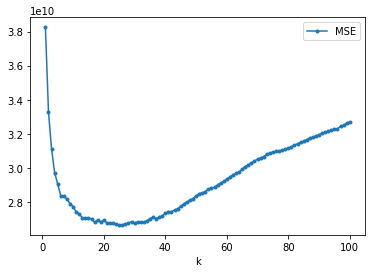

In [29]:
df_result_Reg = pd.DataFrame({ 
                          'k'   : kppv,
                          'MSE' : error_Reg
                        })

k_opt = df_result_Reg['MSE'].values.argmin(0) + 1

_ = df_result_Reg.plot(x='k', y='MSE', style='.-')


In [30]:
k_opt

25

In [31]:
KNN = KNeighborsRegressor(n_neighbors = 11)
KNN.fit(xtrain, ytrain)
KNN.score(xtest,ytest)

0.917329885082049

In [32]:
print(df['store '].corr(df['Weekly Sales']))
print(np.log(df['store ']).corr(df['Weekly Sales']))
print(((df['store '])**0.5).corr(df['Weekly Sales']))
print(np.power(df['store '],1/3).corr(df['Weekly Sales']))

-0.33467369673171615
-0.29497786109743374
-0.31845635613467277
-0.3115002862330936


In [33]:
print(df['Temperature'].corr(df['Weekly Sales']))
print(np.log(df['Temperature']).corr(df['Weekly Sales']))
print(((df['Temperature'])**0.5).corr(df['Weekly Sales']))
print(np.power(df['Temperature'],1/3).corr(df['Weekly Sales']))

-0.06354696332025499
-0.0455393219032559
-0.0559362590801571
-0.05274410372929153


D:\Anaconda\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [34]:
print(df['Fuel_Price'].corr(df['Weekly Sales']))
print(np.log(df['Fuel_Price']).corr(df['Weekly Sales']))
print(((df['Fuel_Price'])**0.5).corr(df['Weekly Sales']))
print(np.power(df['Fuel_Price'],1/3).corr(df['Weekly Sales']))

0.012104477584804861
0.014401287611558913
0.013240465635888536
0.013624785066685787


In [35]:
print(df['CPI'].corr(df['Weekly Sales']))
print(np.log(df['CPI']).corr(df['Weekly Sales']))
print(((df['CPI'])**0.5).corr(df['Weekly Sales']))
print(np.power(df['CPI'],1/3).corr(df['Weekly Sales']))

-0.07567782874489369
-0.07281547748360886
-0.07426701435277962
-0.07378722355997196


In [36]:
print(df['Unemployment'].corr(df['Weekly Sales']))
print(np.log(df['Unemployment']).corr(df['Weekly Sales']))
print(((df['Unemployment'])**0.5).corr(df['Weekly Sales']))
print(np.power(df['Unemployment'],1/3).corr(df['Weekly Sales']))

-0.10808422263411474
-0.1075517669659064
-0.10811722204133811
-0.1079869923701463


In [37]:
print(df['Size'].corr(df['Weekly Sales']))
print(np.log(df['Size']).corr(df['Weekly Sales']))
print(((df['Size'])**0.5).corr(df['Weekly Sales']))
print(np.power(df['Size'],1/3).corr(df['Weekly Sales']))

0.810164053565438
0.776660590621116
0.7981262286830106
0.7919352171641237


<AxesSubplot:xlabel='date', ylabel='Weekly Sales'>

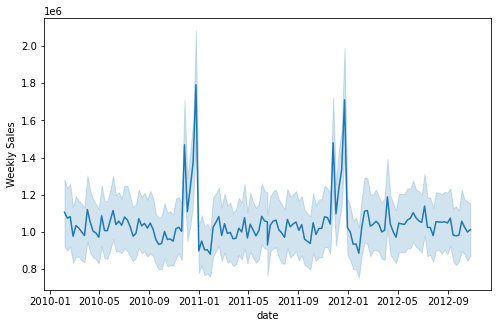

In [38]:

fig, ax = plt.subplots(figsize=(8,5))
sns.lineplot(x='date', y='Weekly Sales',  data=df, ax=ax)

In [39]:
# je vais essayer d'utiliser la date de façon pertinante
# on voit grâce au graphique au-dessus que le mois semble être bien corréler avec les ventes


df['day'] = pd.DatetimeIndex(df['date']).day
df['month'] = pd.DatetimeIndex(df['date']).month
df['weekday'] = pd.DatetimeIndex(df['date']).dayofweek

In [40]:
df

,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,Size,day,month,weekday
0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,0.0,1643690.90,1,0,151315,5,2,4
1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,1.0,1641957.44,1,0,151315,12,2,4
2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,0.0,1611968.17,1,0,151315,19,2,4
3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,0.0,1409727.59,1,0,151315,26,2,4
4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,0.0,1554806.68,1,0,151315,5,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,45.0,2012-09-28,64.88,3.997,192.013558,8.684,0.0,713173.95,45,1,118221,28,9,4
6416,45.0,2012-10-05,64.89,3.985,192.170412,8.667,0.0,733455.07,45,1,118221,5,10,4
6417,45.0,2012-10-12,54.47,4.000,192.327265,8.667,0.0,734464.36,45,1,118221,12,10,4
6418,45.0,2012-10-19,56.47,3.969,192.330854,8.667,0.0,718125.53,45,1,118221,19,10,4


<AxesSubplot:>

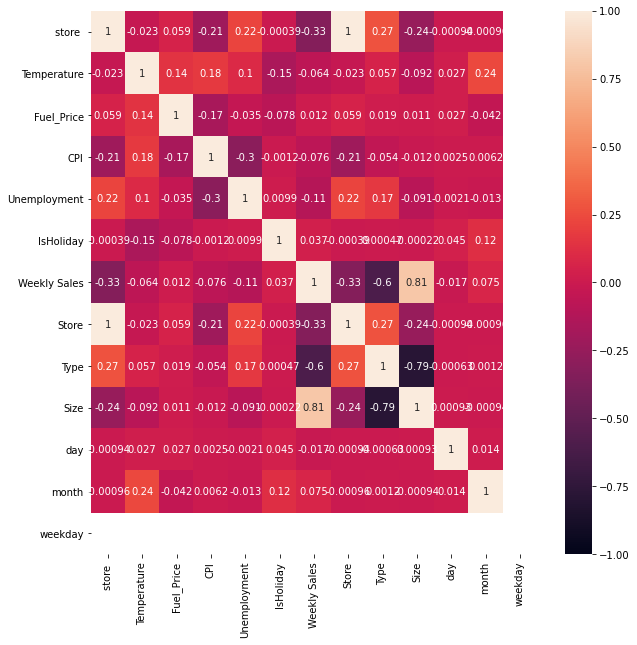

In [41]:
fig, ax = plt.subplots(figsize=(10,10))

sns.heatmap(df.corr(),annot=True,vmin=-1, vmax=1,ax=ax)

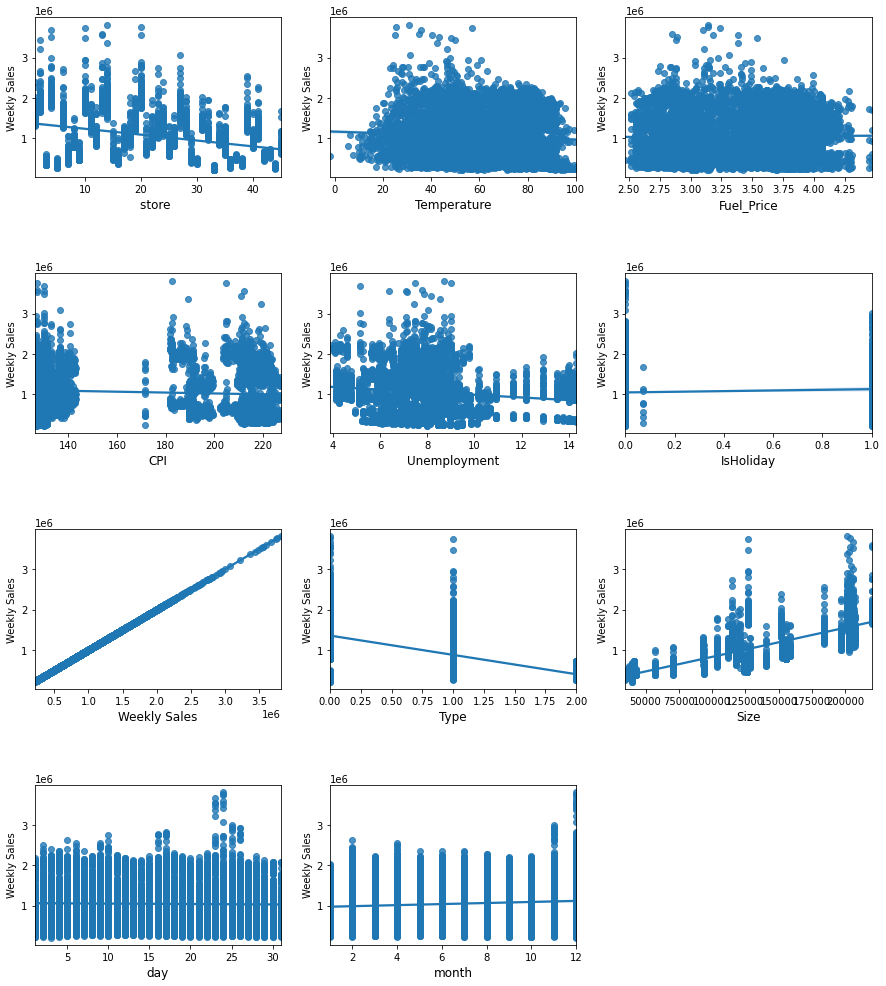

In [42]:
numlist = ['store ','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Weekly Sales','Type','Size','day','month']

rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Weekly Sales", data=df)
    subCnt = subCnt + 1

plt.show()

In [43]:
mapping_type = {
        1: 0,
        2 : 1,
        4: 1,
        5: 0,
        6: 0,
        7: 0,
        8: 0,
        9: 0,
        10: 0,
        11: 2,
        12: 3,
}

df['month']=df['month'].replace(mapping_type)


In [44]:
df['month'].unique()

array([1, 3, 0, 2], dtype=int64)

In [45]:
from sklearn.preprocessing import StandardScaler

list_std=['store ','Temperature','Fuel_Price','CPI','Unemployment','Size']
scale = StandardScaler()
dfscale = scale.fit_transform(df[list_std])

cols_scaled = pd.DataFrame(dfscale,columns=list_std)
cols_scaled.reset_index(drop=True, inplace=True)
df[list_std] = cols_scaled

In [46]:
df[list_std]

,store,Temperature,Fuel_Price,CPI,Unemployment,Size
0,-1.693858,-0.994441,-1.715411,1.005232,0.056737,0.333595
1,-1.693858,-1.200663,-1.767748,1.008942,0.056737,0.333595
2,-1.693858,-1.123601,-1.841891,1.010137,0.056737,0.333595
3,-1.693858,-0.760000,-1.739399,1.010913,0.056737,0.333595
4,-1.693858,-0.767055,-1.599834,1.011689,0.056737,0.333595
...,...,...,...,...,...,...
6415,1.696524,-0.096835,1.141301,0.527227,0.356463,-0.190953
6416,NaN,NaN,NaN,NaN,NaN,NaN
6417,NaN,NaN,NaN,NaN,NaN,NaN
6418,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
df = df.dropna()

In [48]:
df.isna().sum()

store           0
date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Weekly Sales    0
Store           0
Type            0
Size            0
day             0
month           0
weekday         0
dtype: int64

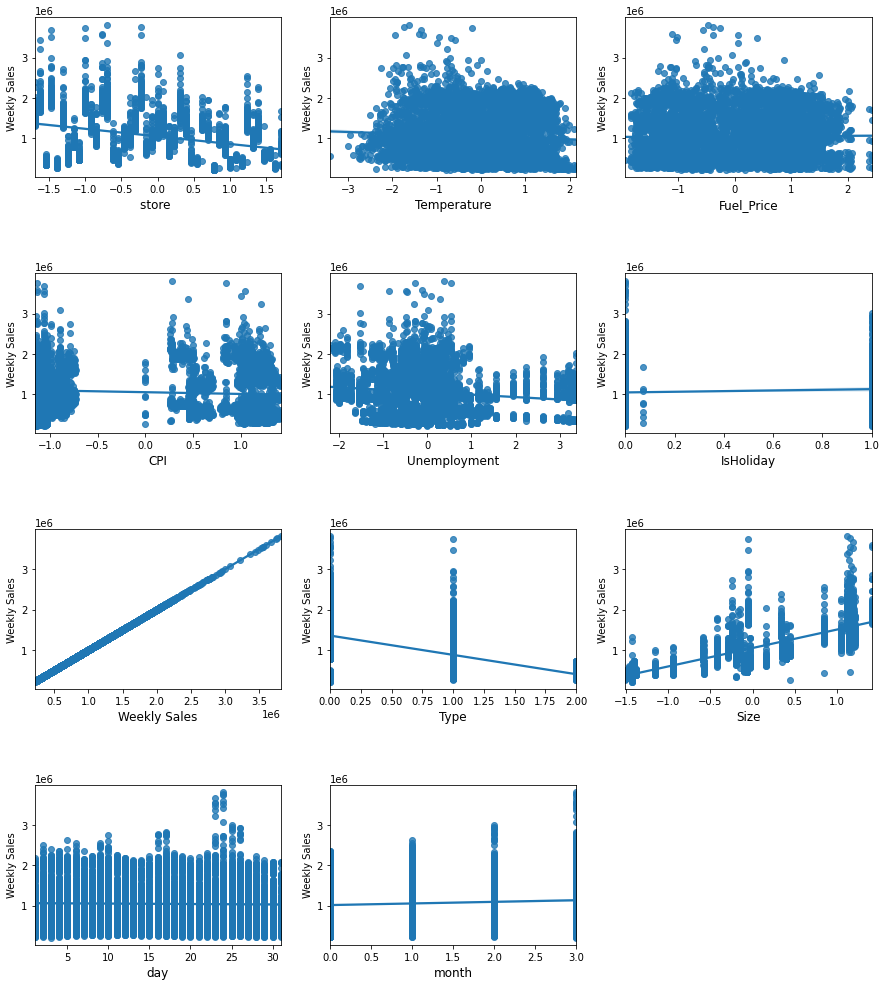

In [49]:
numlist = ['store ','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Weekly Sales','Type','Size','day','month']

rowCnt = len(numlist)
colCnt = 3  
subCnt = 1    

fig = plt.figure(figsize=(15,50))
fig.subplots_adjust(hspace = .6)

for i in (numlist):
    fig.add_subplot(rowCnt, colCnt, subCnt)
    plt.xlabel(i, fontsize=12)
    sns.regplot(x=i, y="Weekly Sales", data=df)
    subCnt = subCnt + 1

plt.show()

In [50]:
df['month'] = pd.DatetimeIndex(df['date']).month

<ipython-input-50-3e338c44bb74>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['month'] = pd.DatetimeIndex(df['date']).month


In [51]:
from sklearn.preprocessing import OneHotEncoder

list_one_hot = ['day','month']
encoder_OH = OneHotEncoder(handle_unknown='error',sparse=False)

fit_OH=encoder_OH.fit(df[list_one_hot])
fit_data_OH=fit_OH.transform(df[list_one_hot])

column_name_OH =fit_OH.get_feature_names(list_one_hot)
cols_OH = pd.DataFrame(fit_data_OH,columns=column_name_OH)
cols_OH.reset_index(drop=True, inplace=True)
cols_OH


,day_1,day_2,day_3,day_4,day_5,day_6,day_7,day_8,day_9,day_10,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6408,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6410,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [52]:
df[list_one_hot].nunique()

day      31
month    12
dtype: int64

In [53]:
df = pd.concat([df, cols_OH], axis=1)

In [54]:
df

,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-1.693858,2010-02-05,-0.994441,-1.715411,1.005232,0.056737,0.0,1643690.90,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.693858,2010-02-12,-1.200663,-1.767748,1.008942,0.056737,1.0,1641957.44,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.693858,2010-02-19,-1.123601,-1.841891,1.010137,0.056737,0.0,1611968.17,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.693858,2010-02-26,-0.760000,-1.739399,1.010913,0.056737,0.0,1409727.59,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.693858,2010-03-05,-0.767055,-1.599834,1.011689,0.056737,0.0,1554806.68,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6411,1.696524,2012-08-31,0.230406,1.392081,0.519713,0.365546,0.0,734297.87,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6412,1.696524,2012-09-07,0.230949,1.365913,0.523704,0.356463,1.0,766512.66,45.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6413,1.696524,2012-09-14,-0.334532,1.398623,0.527694,0.356463,0.0,702238.27,45.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6414,1.696524,2012-09-21,-0.225995,1.331021,0.527786,0.356463,0.0,723086.20,45.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
df = df.dropna()
df.isna().sum()

store           0
date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Weekly Sales    0
Store           0
Type            0
Size            0
day             0
month           0
weekday         0
day_1           0
day_2           0
day_3           0
day_4           0
day_5           0
day_6           0
day_7           0
day_8           0
day_9           0
day_10          0
day_11          0
day_12          0
day_13          0
day_14          0
day_15          0
day_16          0
day_17          0
day_18          0
day_19          0
day_20          0
day_21          0
day_22          0
day_23          0
day_24          0
day_25          0
day_26          0
day_27          0
day_28          0
day_29          0
day_30          0
day_31          0
month_1         0
month_2         0
month_3         0
month_4         0
month_5         0
month_6         0
month_7         0
month_8         0
month_9         0
month_10        0
month_11  

In [56]:
df

,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,...,month_3,month_4,month_5,month_6,month_7,month_8,month_9,month_10,month_11,month_12
0,-1.693858,2010-02-05,-0.994441,-1.715411,1.005232,0.056737,0.0,1643690.90,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,-1.693858,2010-02-12,-1.200663,-1.767748,1.008942,0.056737,1.0,1641957.44,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,-1.693858,2010-02-19,-1.123601,-1.841891,1.010137,0.056737,0.0,1611968.17,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-1.693858,2010-02-26,-0.760000,-1.739399,1.010913,0.056737,0.0,1409727.59,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,-1.693858,2010-03-05,-0.767055,-1.599834,1.011689,0.056737,0.0,1554806.68,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6407,1.696524,2012-08-03,0.784491,1.108590,0.505661,0.365546,0.0,725729.51,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
6408,1.696524,2012-08-10,0.817595,1.204541,0.508623,0.365546,0.0,733037.32,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6409,1.696524,2012-08-17,0.392670,1.285227,0.511731,0.365546,0.0,722496.93,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
6410,1.696524,2012-08-24,0.254285,1.481490,0.515722,0.365546,0.0,718232.26,45.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [57]:
xlist = ['store ','Temperature','Fuel_Price','CPI','Unemployment','IsHoliday','Type','Size']


x = pd.concat([df[xlist], df[column_name_OH]], axis=1)
y = df['Weekly Sales']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=1)


regr = LinearRegression()
regr.fit(xtrain,ytrain)
regr.score(xtest,ytest)

0.7253110969876211

In [58]:
from sklearn.metrics import mean_squared_error,r2_score

ypred = regr.predict(xtest)

print('MSE : ')
print("{:e}".format(mean_squared_error(ytest, ypred)))

MSE : 
8.867453e+10


In [59]:
print(regr.coef_)
print(regr.intercept_)
# j'ai l'impressino que le model n'a pas réussi à s'entraîner sur les mois et les jours

[-9.10914099e+04  1.15322539e+05 -2.11254012e+03 -8.22599107e+04
 -4.67778588e+04  6.00694025e+04  1.02284594e+05  4.97471591e+05
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16  7.63219723e+16
  7.63219723e+16  7.63219723e+16  7.63219723e+16 -2.47768694e+17
 -2.47768694e+17 -2.47768694e+17 -2.47768694e+17 -2.47768694e+17
 -2.47768694e+17 -2.47768694e+17 -2.47768694e+17 -2.47768694e+17
 -2.47768694e+17 -2.47768694e+17 -2.47768694e+17]
1.7144672116531834e+17


## Partie 2


- Je commence par enlever les données aberrantes.

- J'extrait la variable de mois car elle peut quand même être utiles selon moi.

- Je remplace les données manquantes remplaçables et je supprime les données manquante qui reste

- A ce moment là je prends la décision de n'utiliser que 5 variables pour faire la prédiction, je prends les 4 variables qui donnait le plus de corrélation par rapport à l'ancien graphique de corrélation : "store", "Type", "Size" et "Unemployment" et à cela j'ajoute la variable "month".

- Je ne vais pas cette fois-ci faire de mapping mais encoder en one-hot la variable "month" et "Type" ainsi que la variable "store" que j'avais considérer avant comme un variable quantitative.

- J'ai laissé en commentaire ma tentative de standardisation et de normalisation pour montrer que j'ai essayé les deux mais qu'elle n'ont fait que baissé le score final.

- Je vérifie qu'il n'y a pas de valeurs manquantes qui se soit ajoutées, je split mes données et je lance ma tentative finale de prédiction. J'obtient un score de 0.91 avec la régression linéaire, c'est une très grosse augmentation par rapport aux modèle d'avant, l'erreur quadratique moyenne a aussi bien baissée. En regardant les coefficients de régression je me rend conte que les encodages one-hot ont parfaitement fonctionné cette fois-ci, je pense que c'est cela qui justifie la nette augmentation de score. 

- Je lance aussi une prédiction via KNN et j'obtient là-aussi un meilleure score de 0.93.

- Je finis par coder une fonction pour afficher de façon claires les résultat obtenus par les deux modèles.

In [60]:
df1 = pd.read_csv('data2.csv',sep = ';',header=0)
df2 = pd.read_csv('stores.csv',sep = ',',header=0)

df1 = df1.merge(df2, left_on='store ', right_on='Store')

In [61]:
df1 = df1[df1['Weekly Sales']<1e9]
df1 = df1[df1['Weekly Sales']>0]
df1 = df1[df1['Fuel_Price']<10]

In [62]:
df1['month'] = pd.DatetimeIndex(df1['date']).month

In [63]:
df1

,Unnamed: 0,store,date,Temperature,Fuel_Price,CPI,Unemployment,IsHoliday,Weekly Sales,Store,Type,Size,month
0,0,1.0,2010-02-05,42.31,2.572,211.096358,8.106,0.0,1643690.90,1,A,151315,2.0
1,1,1.0,2010-02-12,38.51,2.548,211.242170,8.106,1.0,1641957.44,1,A,151315,2.0
2,2,1.0,2010-02-19,39.93,2.514,211.289143,8.106,0.0,1611968.17,1,A,151315,2.0
3,3,1.0,2010-02-26,46.63,2.561,211.319643,8.106,0.0,1409727.59,1,A,151315,2.0
4,4,1.0,2010-03-05,46.50,2.625,211.350143,8.106,0.0,1554806.68,1,A,151315,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6415,6430,45.0,2012-09-28,64.88,3.997,192.013558,8.684,0.0,713173.95,45,B,118221,9.0
6416,6431,45.0,2012-10-05,64.89,3.985,192.170412,8.667,0.0,733455.07,45,B,118221,10.0
6417,6432,45.0,2012-10-12,54.47,4.000,192.327265,8.667,0.0,734464.36,45,B,118221,10.0
6418,6433,45.0,2012-10-19,56.47,3.969,192.330854,8.667,0.0,718125.53,45,B,118221,10.0


In [64]:
df1 = df1.fillna(value=values)
df1.isna().sum()

Unnamed: 0       0
store            0
date             0
Temperature      0
Fuel_Price       0
CPI              0
Unemployment     0
IsHoliday        0
Weekly Sales     0
Store            0
Type             0
Size             0
month           10
dtype: int64

In [65]:
df1 = df1.dropna()

In [1]:
list_one_hot = ['store ','Type','month']
encoder_OH = OneHotEncoder(handle_unknown='error',sparse=False)

fit_OH=encoder_OH.fit(df1[list_one_hot])
fit_data_OH=fit_OH.transform(df1[list_one_hot])

column_name_OH =fit_OH.get_feature_names(list_one_hot)
cols_OH = pd.DataFrame(fit_data_OH,columns=column_name_OH)
cols_OH.reset_index(drop=True, inplace=True)
cols_OH.nunique()

NameError: name 'df1' is not defined

In [67]:
"""

scale = StandardScaler()
dfscale = scale.fit_transform(df1[stdlist])

cols_scaled = pd.DataFrame(dfscale,columns=stdlist)
cols_scaled.reset_index(drop=True, inplace=True)
df1[stdlist] = cols_scaled
df1[stdlist]"""

### je ne standirse pas cette fois ci car ça baisse le score
"""
normlist = ['Unemployment','Size']

from sklearn import preprocessing

normscaler = preprocessing.MinMaxScaler()
norm = normscaler.fit_transform(df1[normlist])
scaleddf1 = pd.DataFrame(norm, columns=normlist)

df1[normlist] = scaleddf1

"""
### je ne normalise pas non plus car ça baisse aussi le score

"\nnormlist = ['Unemployment','Size']\n\nfrom sklearn import preprocessing\n\nnormscaler = preprocessing.MinMaxScaler()\nnorm = normscaler.fit_transform(df1[normlist])\nscaleddf1 = pd.DataFrame(norm, columns=normlist)\n\ndf1[normlist] = scaleddf1\n\n"

In [68]:
df1.isna().sum()

Unnamed: 0      0
store           0
date            0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
IsHoliday       0
Weekly Sales    0
Store           0
Type            0
Size            0
month           0
dtype: int64

In [69]:
df1 = pd.concat([df1, cols_OH], axis=1)
df1 = df1.dropna()

In [70]:
xlist = ['Unemployment','Size']


x = pd.concat([df1[xlist], df1[column_name_OH]], axis=1)
y = df1['Weekly Sales']

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=101)


regr = LinearRegression()
regr.fit(xtrain,ytrain)
regr.score(xtest,ytest)

0.911668048791387

In [71]:
ypred = regr.predict(xtest)

print('MSE : ')
print("{:e}".format(mean_squared_error(ytest, ypred)))

MSE : 
2.833779e+10


In [72]:

print(regr.coef_)
print(regr.intercept_)

[-9.22632386e+03  6.24351168e+00  3.25370721e+05  3.91138413e+05
 -3.69151174e+04  5.04933000e+05 -9.19703810e+04  1.59953139e+04
 -5.77389327e+04 -3.43490101e+05 -4.43945528e+05  8.85503898e+05
 -1.98426477e+05  1.61452065e+05  3.42861193e+05  5.13388223e+05
 -3.13778492e+05 -6.67099656e+04  9.15704113e+04  1.55622646e+05
 -8.21984396e+04  5.10514402e+05 -2.32354655e+05  6.41637353e+04
  4.31073540e+05 -1.31019475e+05 -2.82931444e+05 -2.39545765e+05
  2.04824537e+05 -1.52310777e+05 -2.14713055e+05 -7.30106053e+04
 -1.47014086e+05 -3.43174293e+05 -2.64070372e+05 -2.65373733e+05
  4.23225894e+04 -1.23276884e+05  1.12900035e+04 -3.19668285e+04
  9.45805245e+03 -2.45477769e+05 -2.44000646e+05  6.55804439e+04
  1.58872884e+05 -1.34401794e+05 -1.26120459e+05  3.91050394e+04
 -3.54691433e+04 -3.63589603e+03  6.29331525e+04  6.25968553e+04
  2.19761091e+04 -4.09077110e+03 -1.81269861e+04 -2.35163207e+04
 -3.03059671e+04 -4.97086951e+03 -1.42408426e+04 -2.32960214e+04
 -2.70011021e+04 -1.95723

In [73]:
KNN = KNeighborsRegressor(n_neighbors = 10)
KNN.fit(xtrain, ytrain)
KNN.score(xtest,ytest)

0.9453023686652534

In [74]:
def model(x,y):
    
    xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25,random_state=101)
    
    regr = LinearRegression()
    regr.fit(xtrain,ytrain)
    print('score LinearRegression : ')
    print(regr.score(xtest,ytest))
    
    ypred = regr.predict(xtest)
    print('')
    print('MSE LinearRegression: ')
    print("{:e}".format(mean_squared_error(ytest, ypred)))
    
    KNN10 = KNeighborsRegressor(n_neighbors = 10)
    KNN30 = KNeighborsRegressor(n_neighbors = 30)
    
    KNN10.fit(xtrain, ytrain)
    KNN30.fit(xtrain, ytrain)
    
    print('')
    print('')
    print('score KNN 10 : ')
    print(KNN10.score(xtest,ytest))
    
    ypred = KNN10.predict(xtest)
    print('')
    print('MSE KNN10 : ')
    print("{:e}".format(mean_squared_error(ytest, ypred)))
    
    print('')
    print('')
    print('score KNN 30 : ')
    print(KNN30.score(xtest,ytest))
    
    
    
    ypred = KNN30.predict(xtest)
    print('')
    print('MSE KNN30 : ')
    print("{:e}".format(mean_squared_error(ytest, ypred)))
    

In [75]:
model(pd.concat([df1[xlist], df1[column_name_OH]], axis=1),df1['Weekly Sales'])

score LinearRegression : 
0.911668048791387

MSE LinearRegression: 
2.833779e+10


score KNN 10 : 
0.9453023686652534

MSE KNN10 : 
1.754756e+10


score KNN 30 : 
0.9389800029794442

MSE KNN30 : 
1.957584e+10


## Partie supplémentaire

Ici, J'essaye de rajouter du feature engineering pour si il est possible d'augmenter encore les performances.

1. J'essaye tout d'abord de rajouter des features ventes des semaines précédentes :

    - Rajouter ces features augmente un peu les performances de la régression linéaire mais baisse un peu celles du KNN, étant donner que c'est ce dernier qui était le plus performant ces nouvelles variables ne me semblent pas pertinentes.
    

2. Dans un second temps je vais recharger les données telles qu'elles sont de base et voir si en multipliant ou en divisant les données quantitatives non utilisées entres elles, il est possible d'obtenir quelque chose :  

    - La multiplication entre "CPI" et "Unemployment" pourrait permettre d'augmenter la corrélation avec les ventes mais c'est très faible.
    
    - Les divisions quant à elle n'améliorent rien.

In [76]:
df1['WS1'] = df['Weekly Sales'].shift(periods=1)
df1['WS2'] = df['Weekly Sales'].shift(periods=2)
df1['WS3'] = df['Weekly Sales'].shift(periods=3)

In [77]:
print(df1['WS1'].corr(df['Weekly Sales']))
print(df1['WS2'].corr(df['Weekly Sales']))
print(df1['WS3'].corr(df['Weekly Sales']))

0.9450210697381215
0.9285738866950156
0.9117907307567825


In [78]:
df1 = df1.dropna()

In [79]:
xlist2 = ['Unemployment','Size','WS1','WS2','WS3']
model(pd.concat([df1[xlist2], df1[column_name_OH]], axis=1),df1['Weekly Sales'])

score LinearRegression : 
0.9180493842688583

MSE LinearRegression: 
2.750568e+10


score KNN 10 : 
0.9373315696492113

MSE KNN10 : 
2.103386e+10


score KNN 30 : 
0.9256045176703224

MSE KNN30 : 
2.496990e+10


In [80]:
df1 = pd.read_csv('data2.csv',sep = ';',header=0)
df2 = pd.read_csv('stores.csv',sep = ',',header=0)
df1 = df1.merge(df2, left_on='store ', right_on='Store')
df1 = df1[df1['Weekly Sales']<1e9]
df1 = df1[df1['Weekly Sales']>0]
df1 = df1[df1['Fuel_Price']<10]

In [81]:
for i in ['Temperature','Fuel_Price','CPI','Unemployment','IsHoliday']:
    print('')
    print(i)
    print('corrélation de base : ')
    print(df1[i].corr(df1['Weekly Sales']))
    
    for j in ['Temperature','Fuel_Price','CPI','Unemployment','IsHoliday']:
        print(j)
        print((df1[i]*df1[j]).corr(df1['Weekly Sales']))
        
    print('')
    print('')


Temperature
corrélation de base : 
-0.06394623790523109
Temperature
-0.07561715002178535
Fuel_Price
-0.052008256681268454
CPI
-0.08873839419297831
Unemployment
-0.11378238872274254
IsHoliday
0.029692732037532473



Fuel_Price
corrélation de base : 
0.012119420412130873
Temperature
-0.052008256681268454
Fuel_Price
0.009890713992536708
CPI
-0.057403849841995355
Unemployment
-0.09086481998930204
IsHoliday
0.038145426193955875



CPI
corrélation de base : 
-0.07535895920278388
Temperature
-0.08873839419297831
Fuel_Price
-0.057403849841995355
CPI
-0.07805469184609957
Unemployment
-0.1363904158604242
IsHoliday
0.03022612448539418



Unemployment
corrélation de base : 
-0.10866248310958238
Temperature
-0.11378238872274254
Fuel_Price
-0.09086481998930204
CPI
-0.1363904158604242
Unemployment
-0.10646946961424644
IsHoliday
0.026340773189860885



IsHoliday
corrélation de base : 
0.03670855158598019
Temperature
0.029692732037532473
Fuel_Price
0.038145426193955875
CPI
0.03022612448539418
Unemploy

In [82]:
for i in ['Temperature','Fuel_Price','CPI','Unemployment']:
    print('')
    print(i)
    print('corrélation de base : ')
    print(df1[i].corr(df1['Weekly Sales']))
    
    for j in ['Temperature','Fuel_Price','CPI','Unemployment']:
        print(j)
        print((df1[i]/df1[j]).corr(df1['Weekly Sales']))
        
    print('')
    print('')
    


Temperature
corrélation de base : 
-0.06394623790523109
Temperature
nan
Fuel_Price
-0.06487566441295539
CPI
-0.012087925401840149
Unemployment
0.018460625200283867



Fuel_Price
corrélation de base : 
0.012119420412130873
Temperature
0.025926307697015347
Fuel_Price
nan
CPI
0.054470592356385975
Unemployment
0.09592306749650385



CPI
corrélation de base : 
-0.07535895920278388
Temperature
-0.006047404410892793
Fuel_Price
-0.07267790803985047
CPI
nan
Unemployment
-0.008281384072999285



Unemployment
corrélation de base : 
-0.10866248310958238
Temperature
-0.015623139266044911
Fuel_Price
-0.09610957616915018
CPI
-0.046300294364366223
Unemployment
nan


